# Assumptions & Considerations

## Columns

- Quantity, Rate and Total Price columns has informations only when the user purchases.
- Rate is the price per unity of product.
- Total price is the quantity multiplied by the rate. 

## Propensity Models

- They are predictive models to determine the behavior of users based on past behavior. 
- This helps us to create customized campaigns to the users.

1. Data time range - 1 year (2019).
2. Trigger based modelling approach - what is the propensity of buying after a user does the intended action (here it is added to cart). 
3. Only users who added the products to cart are considered in this analysis (ignoring users who made a direct buy because there is no trigger).
4. RFM features are used to improve the performance of the model for the existing users.

# Libraries

In [1]:
import inflection 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings 
warnings.filterwarnings('ignore')

from datetime import datetime

# Helper Functions

# Loading Data

In [2]:
data = pd.read_excel('data/final_customer_data.xlsx')
data.head()

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


# 1. Data Description

In [3]:
df1 = data.copy()

## Data Fields Meaning

- User_id: unique identifier for each user.

- Session_id: unique identifier that generates every time a user enters the app and it will expire when the user exits the app. 

- DateTime: timestamp when a particular action is performed. 

- Category: product category.

- SubCategory: product sub category. 

- Actions: these are the event, the actions the users can do in the app. These action may be product view, read reviews, purchase, add to cart, etc.

- Quantity: number of products ordered.

- Rate: it is the price per unity of product.

- Total price is the quantity multiplied by the rate.

## 1.1. Rename Columns

We are going to rename columns from camel case to snake case.

In [4]:
df1.columns

Index(['User_id', 'Session_id', 'DateTime', 'Category', 'SubCategory',
       'Action', 'Quantity', 'Rate', 'Total Price'],
      dtype='object')

In [5]:
cols_old = ['User_id', 'Session_id', 'DateTime', 'Category', 'SubCategory',
            'Action', 'Quantity', 'Rate', 'TotalPrice']

snake_case = lambda x: inflection.underscore(x)

cols_new = list(map(snake_case, cols_old))

#rename
df1.columns = cols_new

In [6]:
df1.columns

Index(['user_id', 'session_id', 'date_time', 'category', 'sub_category',
       'action', 'quantity', 'rate', 'total_price'],
      dtype='object')

## 1.2. Data Dimensions

In [7]:
print("Number of rows: {}".format(df1.shape[0]))
print("Number of cols: {}".format(df1.shape[1]))

Number of rows: 2090
Number of cols: 9


## 1.3. Data Types

In [8]:
df1.dtypes

user_id           int64
session_id       object
date_time        object
category         object
sub_category     object
action           object
quantity        float64
rate            float64
total_price     float64
dtype: object

In [9]:
df1.head(3)

,user_id,session_id,date_time,category,sub_category,action,quantity,rate,total_price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN


### 1.3.1. Data conversion

In [10]:
df1["date_time"] = pd.to_datetime(df1["date_time"])
df1.head()

,user_id,session_id,date_time,category,sub_category,action,quantity,rate,total_price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


In [11]:
df1.dtypes

user_id                  int64
session_id              object
date_time       datetime64[ns]
category                object
sub_category            object
action                  object
quantity               float64
rate                   float64
total_price            float64
dtype: object

## 1.4. NA Check

In [12]:
df1.isna().sum()

user_id            0
session_id         0
date_time          0
category           0
sub_category       0
action             0
quantity        1889
rate            1889
total_price     1889
dtype: int64

In [13]:
df1.isna().sum()/len(df1)

user_id         0.000000
session_id      0.000000
date_time       0.000000
category        0.000000
sub_category    0.000000
action          0.000000
quantity        0.903828
rate            0.903828
total_price     0.903828
dtype: float64

## 1.5. Removing NA 

As we know, the columns quantity, rate and total_price only have informations when the user purchases at least one product. Since these columns have around 90% of NA values, we cannot simply remove those rows. Thus, we are going to assume a value equals zero instead of NA value for this situation.

In [14]:
# quantity
df1['quantity'] = df1['quantity'].fillna(0)

# rate
df1['rate'] = df1['rate'].fillna(0)

# total_price
df1['total_price'] = df1['total_price'].fillna(0)

In [15]:
df1.isna().sum()

user_id         0
session_id      0
date_time       0
category        0
sub_category    0
action          0
quantity        0
rate            0
total_price     0
dtype: int64

## 1.6. Check Balanced Data

## 1.7. Descriptive Statistics

This section is to find inconsistencies, anomalies and also the main characteristics of our data.

In [16]:
num_attributes = df1.drop(columns="user_id").select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.drop(columns="session_id").select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes 

In [17]:
# Central Tendency - Mean, Mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersions - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenar
ct = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
ct.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
ct

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,0.0,100.0,100.0,0.285167,0.0,2.381753,35.517850,1471.724892
1,rate,0.0,90000.0,90000.0,686.023923,0.0,5032.086703,11.406039,153.948294
2,total_price,0.0,160000.0,160000.0,909.344498,0.0,6286.224173,13.453022,251.941719


- Standard deviation is too high compared to the mean values. 
- As we have positive values for skew, we have a skewness to the left. Probably due smaller quantities of products purchased and, consequently, smaller values for rate and total price.
- Since quantity has a 1471 value for kurtosis, it has a high peak.

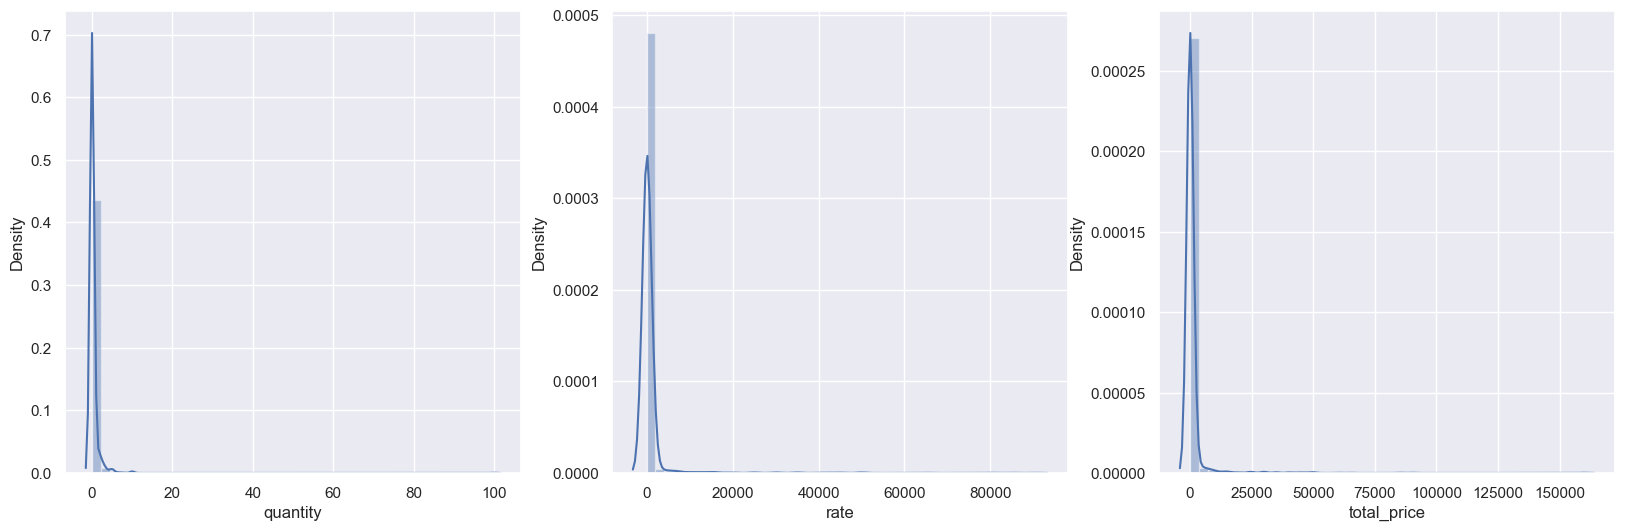

In [18]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.distplot(df1["quantity"])

plt.subplot(132)
sns.distplot(df1["rate"])

plt.subplot(133)
sns.distplot(df1["total_price"])

plt.subplots_adjust(wspace = 0.2)

Let's see how the distribution is without the value zero.

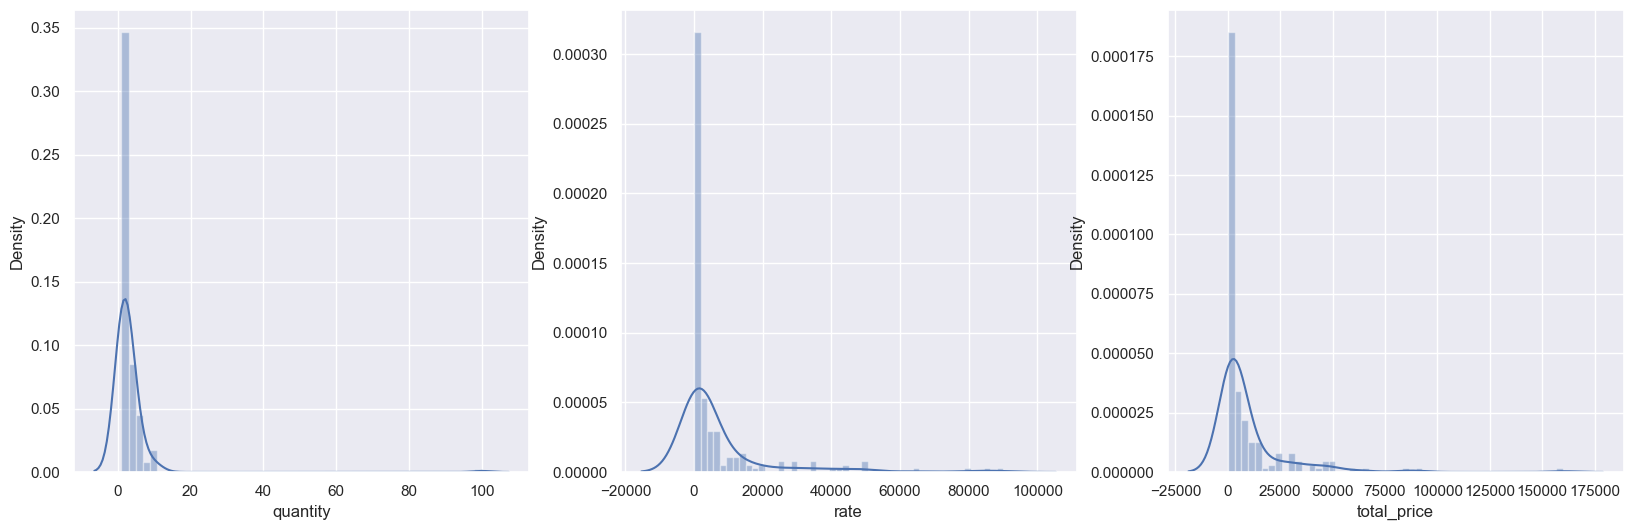

In [19]:
aux = df1[df1["quantity"] != 0]

plt.figure(figsize = (20,6))

plt.subplot(131)
sns.distplot(aux["quantity"])
#plt.xlim(0,)

plt.subplot(132)
sns.distplot(aux["rate"])
#plt.xlim(0,)

plt.subplot(133)
sns.distplot(aux["total_price"])
#plt.xlim(0,)

plt.subplots_adjust(wspace = 0.2)

The majority of purchases is around smaller values for quantity. The result is smaller values for rate and total price too.

### 1.7.2. Categorical Attributes

In [20]:
cat_attributes.apply(lambda x: x.unique().shape[0])

category        105
sub_category    364
action           13
dtype: int64

In [21]:
cat_attributes.apply(lambda x: x.unique())

category        [Electronic Appliances, Men's Fashion, Mobile ...
sub_category    [Speakers, Jeans, Mobile, Cleaning sprays, Cha...
action          [first_app_open, search, product_view, read_re...
dtype: object

In [22]:
cat_attributes["category"].unique()

array(['Electronic Appliances', "Men's Fashion", 'Mobile & Accessories',
       'Cleaning supplies', 'Digital Devices', 'Accessories',
       'Stationary', 'Digital Content', 'Fitness', "Women's Fashion",
       'Household Supplies', 'Smart Wearables', 'Appliances', 'Pet Care',
       'Gardern and Outdoor', 'Camera Accessories', 'eCommerce',
       'Baby Care', 'Gaming Accessories', 'Musical Instruments',
       'Kitchen Appliances', 'Home Appliances', 'Entertainment Systems',
       'Software', 'Pendrives', 'Home Decor', 'Digital Appliances',
       'Electrical tools', 'Large appliances', 'Furnitures',
       'Religious items', 'Artwork', 'Baby Products', 'Car Accessories',
       "Kid's fashion", 'Motorbike Accessories', 'Toys', 'Music',
       'Music\n', 'Gifts', 'Tv and Appliances', 'Bags and Luggage',
       'Large Appliances', 'Industrial', 'Gardening', 'Grocery',
       'Winter Wear', 'Personal Care', "Men's Bottom Wear",
       "Men's Top Wear", 'Shoe care', 'Computer Periphera

In [23]:
cat_attributes["sub_category"].unique()

array(['Speakers', 'Jeans', 'Mobile', 'Cleaning sprays', 'Charging wire',
       'Kindle eBook', 'Watches', 'Cases', 'Books', 'Headphones',
       'Mouse pad', 'Fire Tv', 'Dumbells', 'Ethnic wear', 'Tws earbuds',
       'Cases and Covers', 'Shirts', 'Gloves', 'Dishwasher', 'Bumpers',
       'Denim jeans', 'Smart watches', 'Makeup kit', 'Ropes', 'Printers',
       'Shoes', 'Refrigerators', 'Harddisk', 'Cat food', 'Footwears',
       'Skipping Rope', 'Flower pot', 'Lens', 'Fire TV', 'Oil can',
       'Suspenders', 'Bow tie', 'Paints', 'Ear rings', 'Belt',
       'Frying pan', 'Rice cooker', 'CD-Driver', 'Bangles', 'Powerbells',
       'T-shirt', 'Container', 'Weigh scale', 'Tablet holder', 'Ring',
       'Tops', 'Charger', 'wrist band', 'Delivery bags', 'Women Jacket',
       'Water hose pipe', 'Coolers', 'Baby lotion', 'Aux Cable',
       'USB Cord', 'fitband', 'Screen Guard', 'laptop', 'Web camera',
       'Joystick', 'Tripods', 'Flute', 'Lamp', 'Surround system',
       'Pen stand', '

In [24]:
cat_attributes["action"].unique()

array(['first_app_open', 'search', 'product_view', 'read_reviews',
       'add_review', 'add_to_cart', 'checkout', 'purchase',
       'add_to_wishlist', 'click_wishlist_page', 'product_review',
       'add_to_wishist', 'read_review'], dtype=object)

In [25]:
cat_attributes.describe().T

,count,unique,top,freq
category,2090,105,Mobile & Accessories,139
sub_category,2090,364,Books,46
action,2090,13,read_reviews,342


### 1.7.3. Data Cleaning for Categorical Attributes

We must perform a categorical cleaning, since we have uppercase and words separated by spaces, and special char for the columns category and sub_category.

In [29]:
# category
df1['category'] = df1['category'].apply(lambda x: x.replace(' ', '_').\
                                        replace('\n', '').replace("'s", '').replace("&", "and").lower())

# sub_category
df1['sub_category'] = df1['sub_category'].apply(lambda x: x.replace(' ', '_').\
                                                replace("'s", '').replace("-", '_').lower())                                                                                                                                                          

In [30]:
df1["category"].unique()

array(['electronic_appliances', 'men_fashion', 'mobile_and_accessories',
       'cleaning_supplies', 'digital_devices', 'accessories',
       'stationary', 'digital_content', 'fitness', 'women_fashion',
       'household_supplies', 'smart_wearables', 'appliances', 'pet_care',
       'gardern_and_outdoor', 'camera_accessories', 'ecommerce',
       'baby_care', 'gaming_accessories', 'musical_instruments',
       'kitchen_appliances', 'home_appliances', 'entertainment_systems',
       'software', 'pendrives', 'home_decor', 'digital_appliances',
       'electrical_tools', 'large_appliances', 'furnitures',
       'religious_items', 'artwork', 'baby_products', 'car_accessories',
       'kid_fashion', 'motorbike_accessories', 'toys', 'music', 'gifts',
       'tv_and_appliances', 'bags_and_luggage', 'industrial', 'gardening',
       'grocery', 'winter_wear', 'personal_care', 'men_bottom_wear',
       'men_top_wear', 'shoe_care', 'computer_peripherals', 'health',
       'laptop_accessories', 'l

In [31]:
df1["sub_category"].unique()

array(['speakers', 'jeans', 'mobile', 'cleaning_sprays', 'charging_wire',
       'kindle_ebook', 'watches', 'cases', 'books', 'headphones',
       'mouse_pad', 'fire_tv', 'dumbells', 'ethnic_wear', 'tws_earbuds',
       'cases_and_covers', 'shirts', 'gloves', 'dishwasher', 'bumpers',
       'denim_jeans', 'smart_watches', 'makeup_kit', 'ropes', 'printers',
       'shoes', 'refrigerators', 'harddisk', 'cat_food', 'footwears',
       'skipping_rope', 'flower_pot', 'lens', 'oil_can', 'suspenders',
       'bow_tie', 'paints', 'ear_rings', 'belt', 'frying_pan',
       'rice_cooker', 'cd_driver', 'bangles', 'powerbells', 't_shirt',
       'container', 'weigh_scale', 'tablet_holder', 'ring', 'tops',
       'charger', 'wrist_band', 'delivery_bags', 'women_jacket',
       'water_hose_pipe', 'coolers', 'baby_lotion', 'aux_cable',
       'usb_cord', 'fitband', 'screen_guard', 'laptop', 'web_camera',
       'joystick', 'tripods', 'flute', 'lamp', 'surround_system',
       'pen_stand', 'mcafee_prot